<a href="https://colab.research.google.com/github/Shahzodbey/data_science_mohirdev/blob/main/ML_models/tosh_uy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libs

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


## Cleaning columns

In [193]:
df[df['price'] == 'Договорная'].index # price columns had some non int values so this must be deleted

Int64Index([ 202,  411,  439,  460,  507,  521,  522,  523,  584,  800,  873,
             880,  882,  883,  886,  892,  988, 1027, 1318, 1541, 1601, 1804,
            1805, 2004, 2006, 2580, 2625, 2673, 2705, 2797, 2894, 2942, 3431,
            3436, 3454, 3455, 3456, 3470, 3495, 3510, 3528, 3535, 3536, 3572,
            3574, 3589, 3605, 3637, 3677, 3711, 3712, 3713, 3714, 4061, 4158,
            4188, 4278, 4298, 4328, 4361, 4420, 4425, 4453, 4659, 4746, 4747,
            4879, 5002, 5003, 5004, 5105, 5637, 5801, 5838, 5848, 5887, 5920,
            6099, 6542, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6639, 6662,
            6738, 6819, 6836, 6843, 6859, 6954, 7039, 7196, 7323, 7403, 7404],
           dtype='int64')

In [194]:

df.drop(df[df['price'] == 'Договорная'].index, axis=0, inplace=True)

In [195]:
df['price'] = df['price'].astype(dtype='int')

In [197]:
df.at[df[df['size'] == 'Площадьземли:1сот'].index[0], 'size'] = 100 # the same with size column

In [198]:
df['size'] = df['size'].astype(dtype='float')
df['size'] = df['size'].map(lambda x: np.around(x))
df['size'] = df['size'].astype(dtype='int')

In [199]:
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.535092,3.693678,6.023841,7.133421e+04
std,1.083200,1501.057482,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


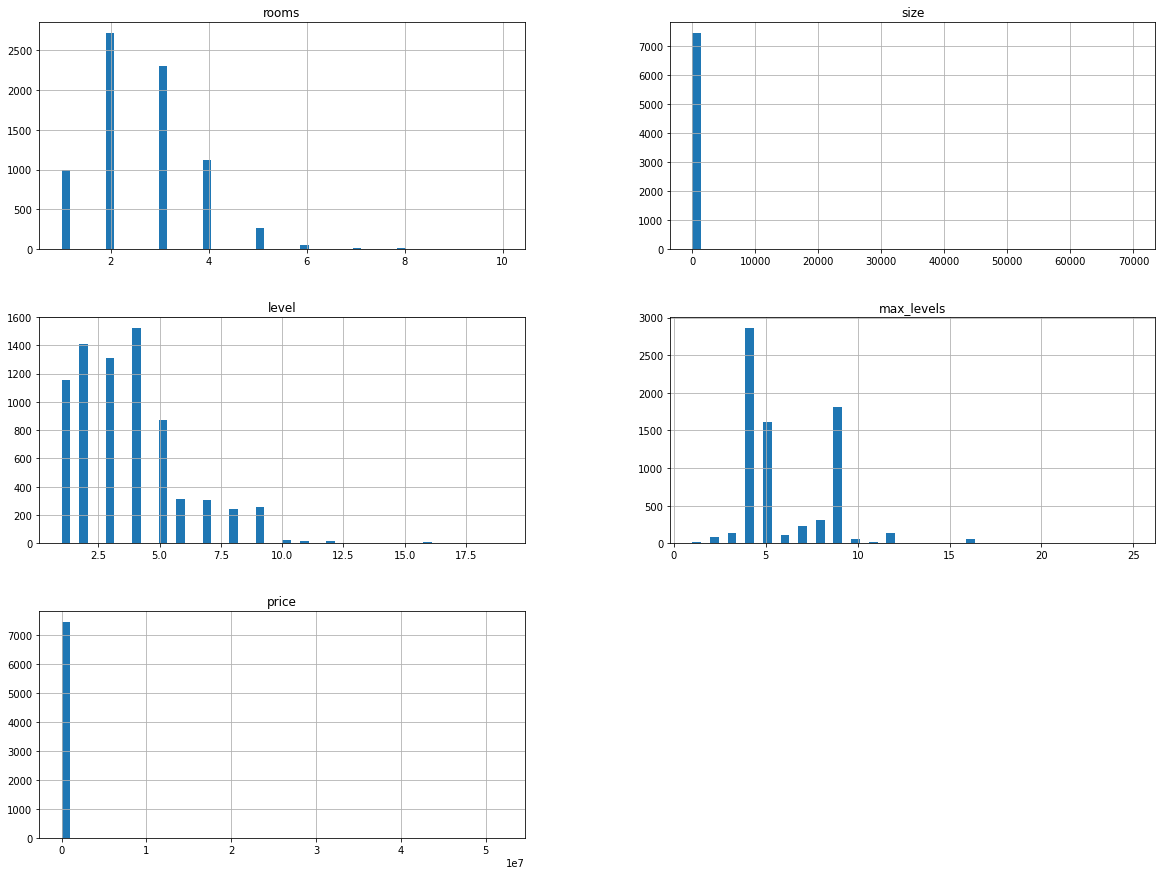

In [200]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [201]:
df['rooms'].value_counts()

2     2717
3     2308
4     1124
1      993
5      257
6       44
7       12
8        6
10       5
Name: rooms, dtype: int64

In [202]:
df['level'].value_counts()

4     1525
2     1408
3     1308
1     1155
5      873
6      315
7      306
9      255
8      244
10      21
12      19
11      15
16       9
13       6
15       2
18       2
14       2
19       1
Name: level, dtype: int64

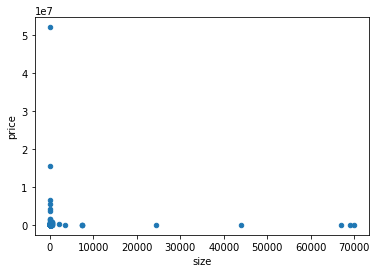

In [203]:
df.plot(kind='scatter', x='size', y='price')
plt.show()

In [204]:
df['size'].value_counts()

70      380
60      378
50      338
65      258
80      251
       ... 
154       1
313       1
216       1
3         1
2100      1
Name: size, Length: 238, dtype: int64

In [205]:
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.535092,3.693678,6.023841,7.133421e+04
std,1.083200,1501.057482,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


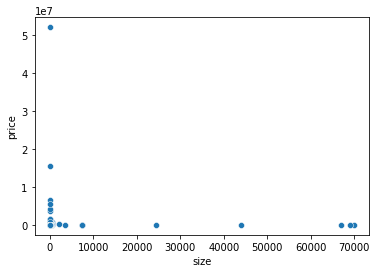

In [206]:
sns.scatterplot(x=df['size'], y=df['price'])
plt.show()

In [207]:
df.quantile(0.99)

rooms              5.00
size             226.75
level             10.00
max_levels        14.70
price         280000.00
Name: 0.99, dtype: float64

## Dealing with outliers

In [208]:
df[df['price'] > 280000].sort_values(by='price', ascending=False)

,location,district,rooms,size,level,max_levels,price
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72,2,5,52000000
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114,5,7,15504000
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85,2,3,6630000
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96,2,5,5568000
6517,"город Ташкент, Юнусабадский район, Юнусабад 5к...",Юнусабадский,3,80,8,9,4240000
...,...,...,...,...,...,...,...
5461,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,5,254,1,8,285000
4187,"город Ташкент, Мирзо-Улугбекский район, Новомо...",Мирзо-Улугбекский,3,152,4,8,285000
1701,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,6,252,1,8,285000
1700,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,5,254,1,8,285000


In [209]:
idx = df[(df['size'] < 14) | (df['size'] > 500)].index
df.drop(idx, axis=0, inplace=True)

In [210]:
idx1 = df[(df['price'] < 15000) & (df['rooms'] != 1)].index
df.drop(idx1, axis=0, inplace=True)

In [211]:
idx2 = df[df['price'] > 800000].index
df.drop(idx2, axis=0, inplace=True)

In [212]:
for i in range(df.shape[0]):
  if df.iat[i, 4] > df.iat[i, 5]:
    print(df.loc[i])

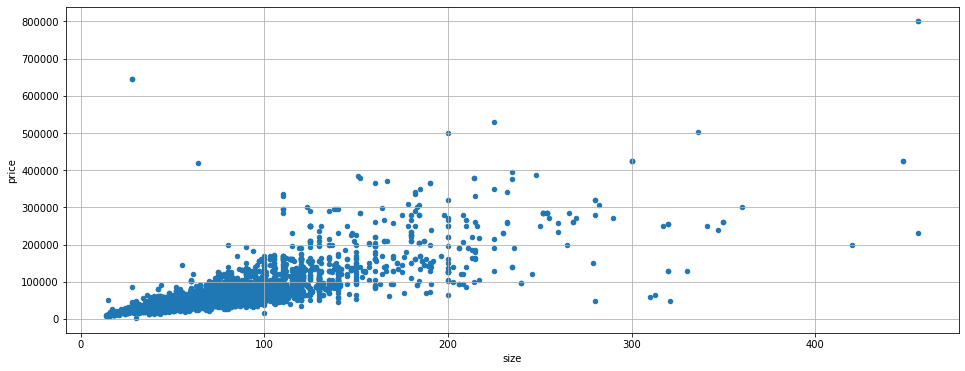

In [213]:
df.plot(kind='scatter', x='size', y='price', figsize=(16, 6))
plt.grid()
plt.show()

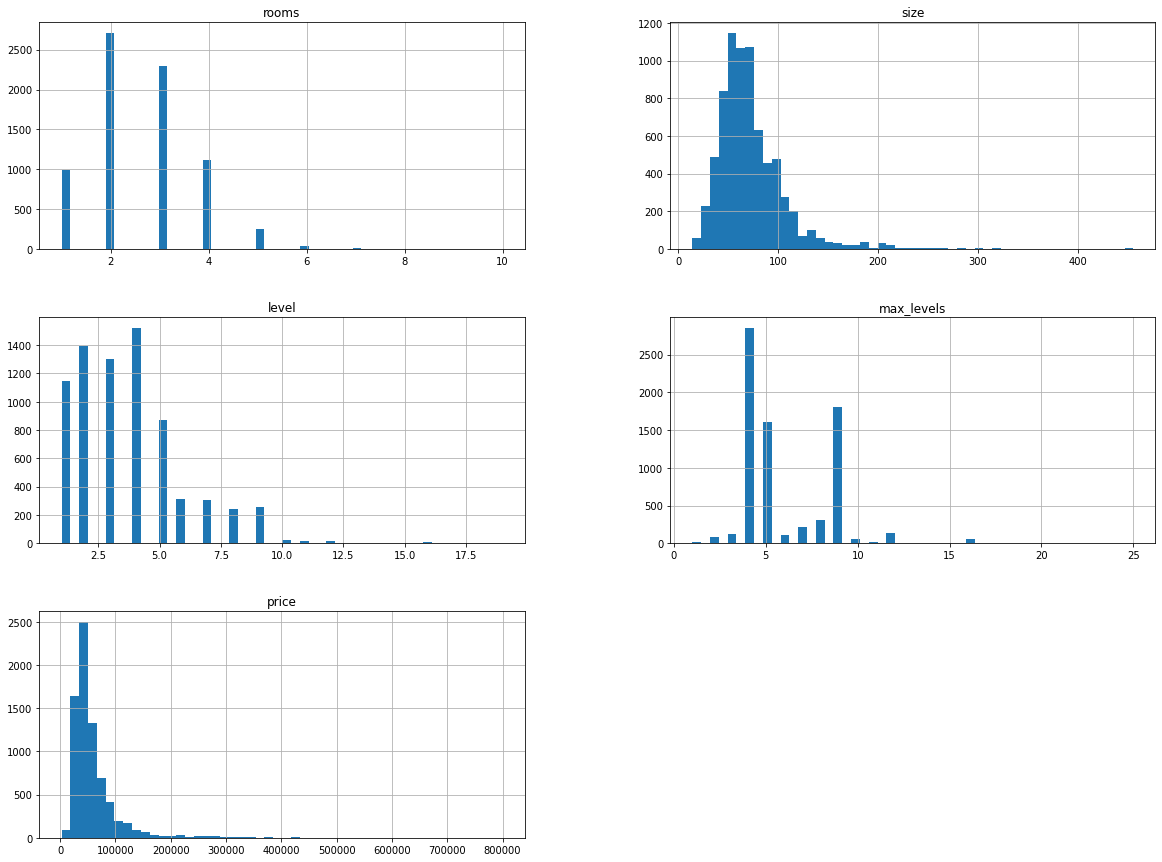

In [214]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [215]:
df.describe()

,rooms,size,level,max_levels,price
count,7429.000000,7429.000000,7429.000000,7429.000000,7429.000000
mean,2.618791,73.120743,3.698210,6.030017,59100.545161
std,1.077279,37.005837,2.238096,2.607162,46705.099896
min,1.000000,14.000000,1.000000,1.000000,2400.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66847.000000
max,10.000000,456.000000,19.000000,25.000000,800000.000000


In [216]:
idx3 = df[df['price'] < 10000].index
df.drop(idx3, axis=0, inplace=True)

In [217]:
df.drop('location', axis=1, inplace=True)

In [218]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [219]:
df.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.787775,0.139722,0.185012,0.552788
size,0.787775,1.000000,0.160931,0.276414,0.781795
level,0.139722,0.160931,1.000000,0.592970,0.059206
max_levels,0.185012,0.276414,0.592970,1.000000,0.219857
price,0.552788,0.781795,0.059206,0.219857,1.000000


In [220]:
df['val_space'] = df['size']/df['rooms'] # valueable space

In [221]:
df['per_level'] = df['level'] / df['max_levels']

In [222]:
df.drop('per_level', axis=1, inplace=True)

In [223]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.781795
rooms         0.552788
val_space     0.337734
max_levels    0.219857
level         0.059206
dtype: float64

In [224]:
df

,district,rooms,size,level,max_levels,price,val_space
0,Юнусабадский,3,57,4,4,52000,19.000000
1,Яккасарайский,2,52,4,5,56000,26.000000
2,Чиланзарский,2,42,4,4,37000,21.000000
3,Чиланзарский,3,65,1,4,49500,21.666667
4,Чиланзарский,3,70,3,5,55000,23.333333
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500,38.000000
7561,Яшнободский,2,49,1,4,32000,24.500000
7562,Шайхантахурский,2,64,3,9,40000,32.000000
7563,Мирзо-Улугбекский,1,18,1,4,11000,18.000000


# Part II

In [225]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)

x_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()

In [226]:
x_num = x_train.drop('district', axis=1)

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler())
])


In [240]:
from sklearn.compose import ColumnTransformer

num_attribs = list(x_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [241]:
list(x_num)

['rooms', 'size', 'level', 'max_levels', 'val_space']

In [242]:
x_prep = full_pipeline.fit_transform(x_train)

In [243]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()



LR_model.fit(x_prep, y_train)

LinearRegression()

In [244]:
x_test = test_set.drop('price', axis=1)
x_test

,district,rooms,size,level,max_levels,val_space
6300,Учтепинский,3,80,7,9,26.666667
4571,Учтепинский,2,48,1,4,24.000000
1217,Учтепинский,1,40,1,4,40.000000
1518,Чиланзарский,4,80,4,5,20.000000
1328,Учтепинский,3,67,3,4,22.333333
...,...,...,...,...,...,...
4548,Мирзо-Улугбекский,2,90,9,25,45.000000
6035,Мирзо-Улугбекский,2,46,4,4,23.000000
2735,Сергелийский,2,62,4,4,31.000000
131,Чиланзарский,3,60,3,5,20.000000


In [245]:
y_test = test_set['price'].copy()
y_test

6300     45000
4571     37000
1217     23500
1518     64000
1328     39000
         ...  
4548    135500
6035     28000
2735     28000
131      47000
2043     59849
Name: price, Length: 1485, dtype: int64

In [246]:
x_test_prep = full_pipeline.transform(x_test)

In [247]:
y_predicted = LR_model.predict(x_test_prep)

In [248]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
mae

14493.842126924364

In [249]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 27087.305354697673


In [252]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(x_prep, y_train)


RandomForestRegressor()

In [253]:
y_predicted = RF_model.predict(x_test_prep)

In [254]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
mae

11441.506593722772

In [255]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 25864.86475456611


In [256]:
df

,district,rooms,size,level,max_levels,price,val_space
0,Юнусабадский,3,57,4,4,52000,19.000000
1,Яккасарайский,2,52,4,5,56000,26.000000
2,Чиланзарский,2,42,4,4,37000,21.000000
3,Чиланзарский,3,65,1,4,49500,21.666667
4,Чиланзарский,3,70,3,5,55000,23.333333
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500,38.000000
7561,Яшнободский,2,49,1,4,32000,24.500000
7562,Шайхантахурский,2,64,3,9,40000,32.000000
7563,Мирзо-Улугбекский,1,18,1,4,11000,18.000000


In [257]:
x = df.drop('price', axis=1)
y = df['price'].copy()

In [258]:
x_prepp = full_pipeline.transform(x)

In [264]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model, x_prepp, y, scoring="neg_mean_squared_error", cv=10)


In [265]:
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Std.dev:", scores.std())

In [266]:
display_scores(np.sqrt(-mse_scores))

Scores: [20882.42675406 17899.84181738 31004.46488783 26867.37772264
 30956.47268706 29475.35877205 38199.73937823 24444.92295181
 22288.99138555 28466.27275735]
Mean: 27048.586911396553
Std.dev: 5606.732722322467


In [267]:
import pickle

filename = 'uybor.pkl'

with open(filename, 'wb') as file:
  pickle.dump(RF_model, file)

In [269]:
import joblib

filename = 'uybor.jbl'

joblib.dump(full_pipeline, filename)

['uybor.jbl']